In [5]:
import numpy as np
import uproot as up 
import os 
import matplotlib.pyplot as plt
import yaml
import mplhep as hep

os.environ["DPUSER"] = '/work/submit/mori25/Darkphotons_ludo/'
DP_USER = os.environ.get("DPUSER", None)

def load_analysis_config():
    try:
        with open(os.path.join(DP_USER,"config/analysis_config.yml"), "r") as f:
            config = yaml.load(f, Loader=yaml.FullLoader)
        return config
    except Exception as e: 
        raise e
    
config = load_analysis_config()

pathJpsiMC = os.path.join(config["locations"]["MC_InclusiveMinBias"]["Jpsi"],"merged_A.root:tree")
pathJpsiData = os.path.join(config["locations"]["offline"]["Jpsi"],"merged_A_bkp.root:tree")
pathYMC = os.path.join(config["locations"]["MC_InclusiveMinBias"]["Y"],"mergedY_A.root:tree")
pathYData = os.path.join(config["locations"]["offline"]["Y"],"merged_A_bkp.root:tree")

pathMClmDY = os.path.join(config["locations"]["MC_lmDY"]["inclusive"],"merged_A.root:tree")

treeJpsiMC = up.open(pathJpsiMC)
treeJpsiData = up.open(pathJpsiData)
treeYMC = up.open(pathYMC)
treeYData = up.open(pathYData)

treelmDY = up.open(pathMClmDY)


massJpsi = treeJpsiData["Mm_mass"].array() 
massJpsiMC = treeJpsiMC["Mm_mass"].array() 
massY = treeYData["Mm_mass"].array() 
massYMC = treeYMC["Mm_mass"].array() 

masslmDY=treelmDY["Mm_mass"].array()

print(pathYMC)

/data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_InclusiveMinBias/Y/mergedY_A.root:tree


In [6]:
print("Mm_kin_pt" in treeJpsiData.keys())#["Mm_kin_pt"])
print(np.sum(np.abs(treeJpsiData["Mm_mu2_eta"])>1.9))

False
1474


In [7]:
def plot_hist(data,names,nbins=100, weights = None, xlabel = None, saveas=None, text = None, xlim=None, log = False, density=False, int_xticks = False):
        hep.style.use("CMS")
        colors = plt.cm.tab10.colors
        fig, ax = plt.subplots(figsize=(12,9))
        hep.cms.text("Preliminary")
        if weights is not None:
            for d,w,name,c in zip(data,weights,names,colors[:len(data)]):
                ax.hist(d, bins = nbins, weights=w, range = xlim, label=name, color=c, density = density, log=log, histtype='step', linewidth=2)
                # ax.hist(d, bins = nbins, range = xlim, color=c, density = density, log=log, alpha = 0.5)# hatch = '*',
        else: 
            for d,name,c in zip(data,names,colors[:len(data)]):
                ax.hist(d, bins = nbins, range = xlim, label=name, color=c, density = density, log=log, histtype='step', linewidth=2)
                # ax.hist(d, bins = nbins, range = xlim, color=c, density = density, log=log, alpha = 0.5)# hatch = '*',
        if (xlabel): ax.set_xlabel(xlabel)
        if text!=None: ax.text(0.02, .8, text, fontsize=11, bbox=dict(facecolor='white', edgecolor='black'), transform=ax.transAxes) 
        if int_xticks: ax.xaxis.get_major_locator().set_params(integer=True)
        ax.set_ylabel('Normalized frequency')
        ax.set_xlim(xlim)
        ax.legend()
        ax.grid(True)
        if saveas: 
            plt.savefig(saveas)
            print(f"saved figure as {saveas}")
        return

In [21]:

branches = {"Mm_kin_lxy":{'t': 'f','lim' : (0,0.2)},
            "Mm_mass":{'t':'f','lim':None},
            # "Muon_softMva1":{'t': 'f','lim' : (-1,1)},
            # "Muon_softMva2":{'t': 'f','lim' : (-1,1)},
            # "Mm_kin_l3d":{'t': 'f','lim' : (0,0.05)},
            # "Mm_iso":{'t': 'f','lim' : None},
            # "Mm_kin_vtx_chi2dof":{'t': 'f','lim' : (0,20)},
            # "Mm_kin_vtx_prob":{'t': 'f','lim' : (0,1)},
            # "Mm_kin_alpha":{'t': 'f','lim' : (0,np.pi)},
            # "Mm_kin_alphaBS":{'t': 'f','lim' : (0,np.pi)},
            # "Mm_closetrk":{'t': 'i','lim' : (0,10)},
            # "Mm_closetrks1":{'t': 'i','lim' : (0,80)},
            # "Mm_closetrks2":{'t': 'i','lim' : (0,120)},
            # "Mm_kin_pvip":{'t': 'f','lim' : (0,0.05)},
            # "Mm_kin_spvip":{'t': 'f','lim' : (0,20)},
            # "Mm_m1iso":{'t': 'f','lim' : (0,1)},
            # "Mm_m2iso":{'t': 'f','lim' : (0,1)},
            # "Mm_kin_sl3d":{'t': 'f','lim' : (0,20)},
            # "Mm_nDisTrks":{'t': 'i','lim' : (0,8)},
            "Mm_mu1_pt":{'t': 'f','lim' : (0,20)},
            # "Mm_mu2_pt":{'t': 'f','lim' : (0,20)},
            # "Mm_kin_pt":{'t': 'f','lim' : (0,40)},
            # "Mm_mu2_eta":{'t': 'f','lim' :None},
            # "Mm_docatrk":{'t': 'i','lim' : (0,8)},    
            "Mm_kin_eta":{'t': 'f','lim' :None},    
            "Mm_mu1_eta":{'t': 'f','lim' :None},    
            # "Mm_mu2_eta":{'t': 'f','lim' :None},    
            # "Mm_kin_pvlip":{'t': 'f','lim' :(0,0.1)},
            # "Mm_otherVtxMaxProb":{'t': 'f','lim' :(0.8,1)},
            # "Mm_otherVtxMaxProb1":{'t': 'f','lim' :(0.8,1)},
            # "Mm_otherVtxMaxProb2":{'t': 'f','lim' :(0,1)},
            # "Mm_mva":{'t': 'f','lim' :(-0.2,0.2)}
            }

In [22]:
sjpsi = [False for i in range(len(massJpsi))] 
for lims in config["BDT_training"]["Jpsi"]["limits"]["signal"]:
    sjpsi = sjpsi|((massJpsi>lims[0])&(massJpsi<lims[1]))
bkgjpsi = [False for i in range(len(massJpsi))] 
for lims in config["BDT_training"]["Jpsi"]["limits"]["background"]:
    bkgjpsi = bkgjpsi|((massJpsi>lims[0])&(massJpsi<lims[1]))

sY = [False for i in range(len(massY))] 
for lims in config["BDT_training"]["Y"]["limits"]["signal"][:-1]:
    sY = sY|((massY>lims[0])&(massY<lims[1]))
bkgY = [False for i in range(len(massY))] 
for lims in config["BDT_training"]["Y"]["limits"]["background"]:
    bkgY = bkgY|((massY>lims[0])&(massY<lims[1]))


dimuonTriggerCut = treelmDY["HLT_Dimuon0_LowMass"].array()==1
print("efficiency dimuonTrigger", sum(dimuonTriggerCut)/len(dimuonTriggerCut))

# sjpsi_lmDY = [False for i in range(len(masslmDY))] 
# for lims in config["BDT_training"]["Jpsi"]["limits"]["signal"]:
#     sjpsi_lmDY = sjpsi_lmDY|((masslmDY>lims[0])&(masslmDY<lims[1]))
# bkgjpsi_lmDY = [False for i in range(len(masslmDY))] 
# for lims in config["BDT_training"]["Jpsi"]["limits"]["background"]:
#     bkgjpsi_lmDY = bkgjpsi_lmDY|((masslmDY>lims[0])&(masslmDY<lims[1]))

sjpsi_lmDY = treelmDY["Mm_gen_pdgId"].array()==443
print(sum(sjpsi_lmDY))

sY_lmDY = treelmDY["Mm_gen_pdgId"].array()==553
print(sum(sY_lmDY))

# print(len(massJpsi), len(massJpsiMC),len(massY), len(massYMC), )
# print(np.sum(sjpsi),massJpsi[sjpsi])

efficiency dimuonTrigger 0.1349106440991023
24
10


KeyError: 'Mm_kin_pt'

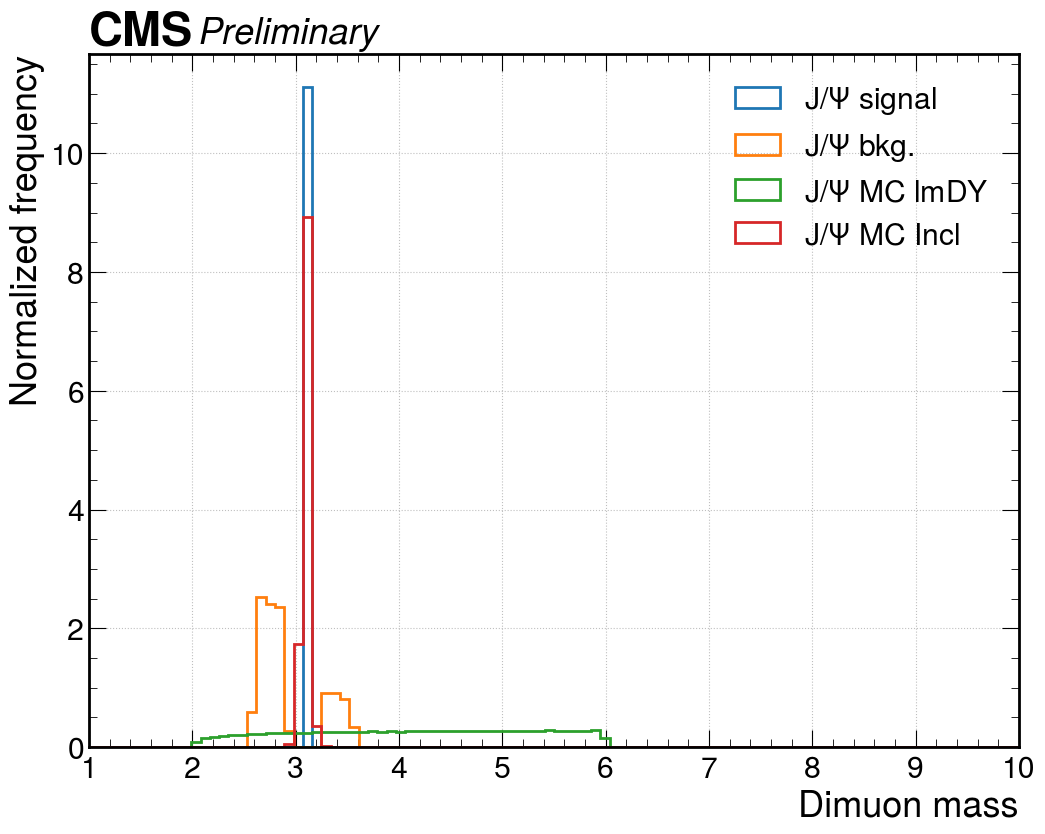

In [23]:
signal_pure = treeJpsiData["Mm_mass"].array()[sjpsi]
bkg_pure = treeJpsiData["Mm_mass"].array()[bkgjpsi]
signal_MClmDY = treelmDY["Mm_mass"].array()[dimuonTriggerCut]#[treeMC["Mm_kin_lxy"].array() > 10]
signal_MC = treeJpsiMC["Mm_mass"].array()#[treeMC["Mm_kin_pt"].array() > 10]
plot_hist([signal_pure,bkg_pure,signal_MClmDY,signal_MC],["J/$\Psi$ signal","J/$\Psi$ bkg.","J/$\Psi$ MC lmDY","J/$\Psi$ MC Incl"],xlabel=str("Dimuon mass"),xlim=(1,10), density=True)

signal_pure = []#treeJpsiData["Mm_kin_pt"].array()[sjpsi]
bkg_pure = []#treeJpsiData["Mm_kin_pt"].array()[bkgjpsi]
signal_MC = treeJpsiMC["Mm_kin_pt"].array()#[treeMC["Mm_kin_pt"].array() > 10]
signal_MClmDY = treelmDY["Mm_kin_pt"].array()[dimuonTriggerCut]#[treeMC["Mm_kin_pt"].array() > 10]
plot_hist([signal_pure,bkg_pure,signal_MC,signal_MClmDY],["J/$\Psi$ signal","J/$\Psi$ bkg.","J/$\Psi$ MC Incl","J/$\Psi$ MC lmDY"],xlabel=str("Dimuon $p_T$"),xlim=branches["Mm_kin_pt"]['lim'],density=True)#,signal_id,bkg_id

signal_pure = treeJpsiData["Mm_kin_lxy"].array()[sjpsi]
signal_pureY = treeYData["Mm_kin_lxy"].array()[sY]
bkg_pure = treeJpsiData["Mm_kin_lxy"].array()[bkgjpsi]
signal_MC = treeJpsiMC["Mm_kin_lxy"].array()#[treeMC["Mm_kin_lxy"].array() > 10]
signal_MClmDY = treelmDY["Mm_kin_lxy"].array()[dimuonTriggerCut]#[treeMC["Mm_kin_lxy"].array() > 10]
plot_hist([signal_pure,bkg_pure,signal_MC,signal_MClmDY, signal_pureY],["J/$\Psi$ signal","J/$\Psi$ bkg.","J/$\Psi$ MC Incl","J/$\Psi$ MC lmDY", "Y(1S) signal"],xlabel=str("Mm_kin_lxy"),xlim=branches["Mm_kin_lxy"]['lim'],density=True)#,signal_id,bkg_id

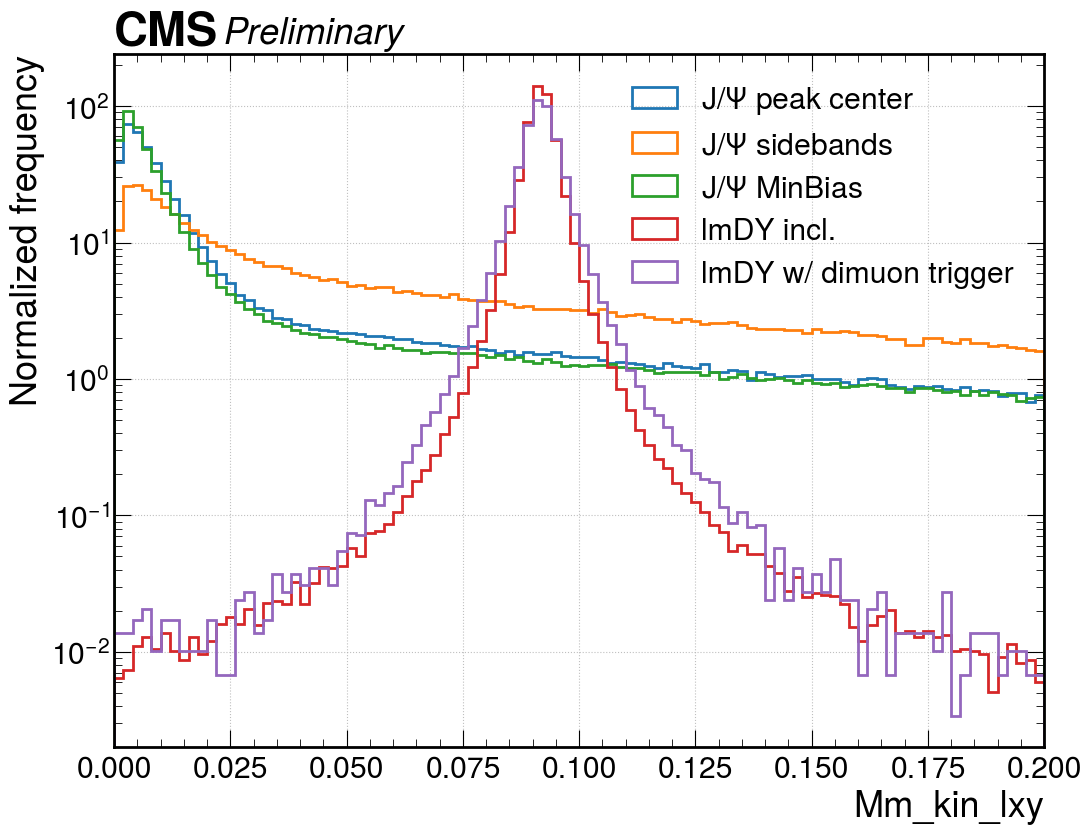

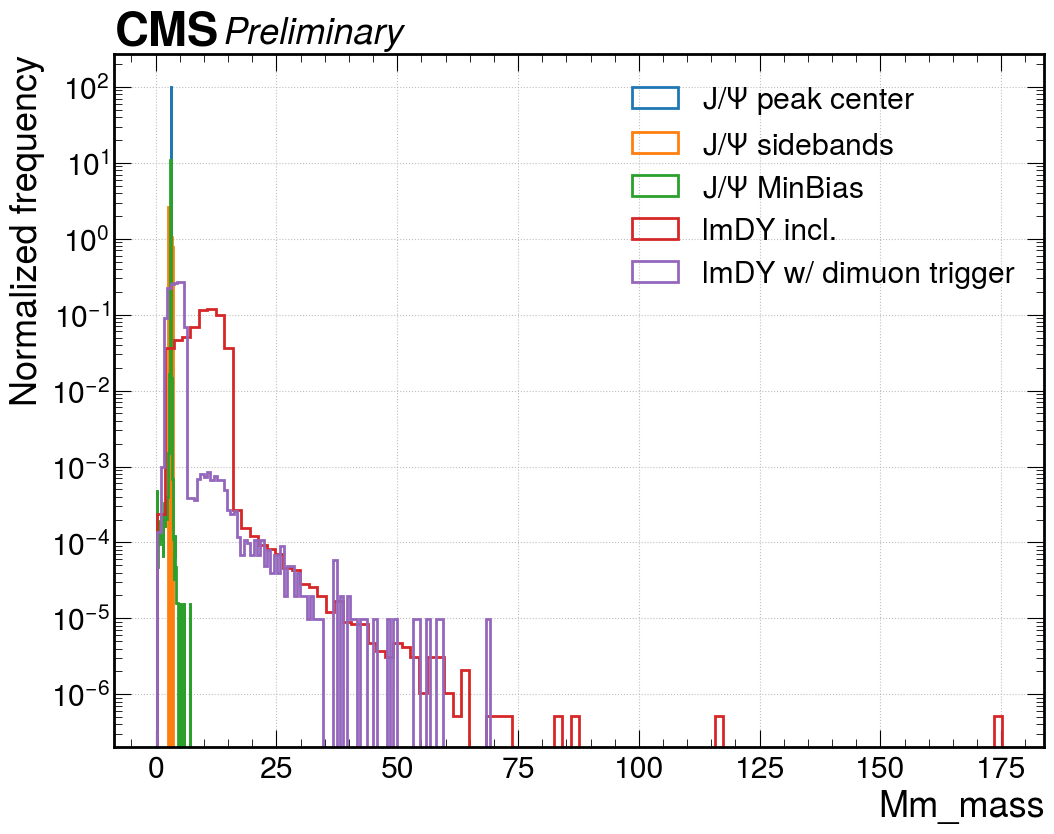

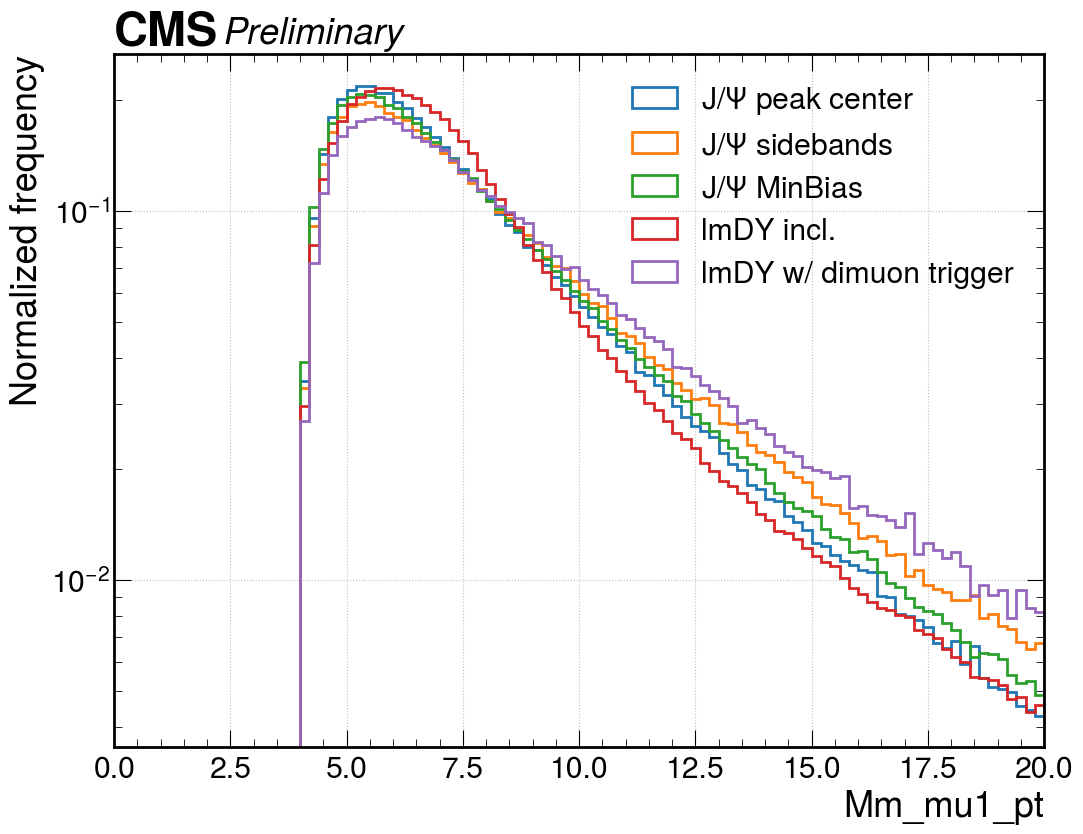

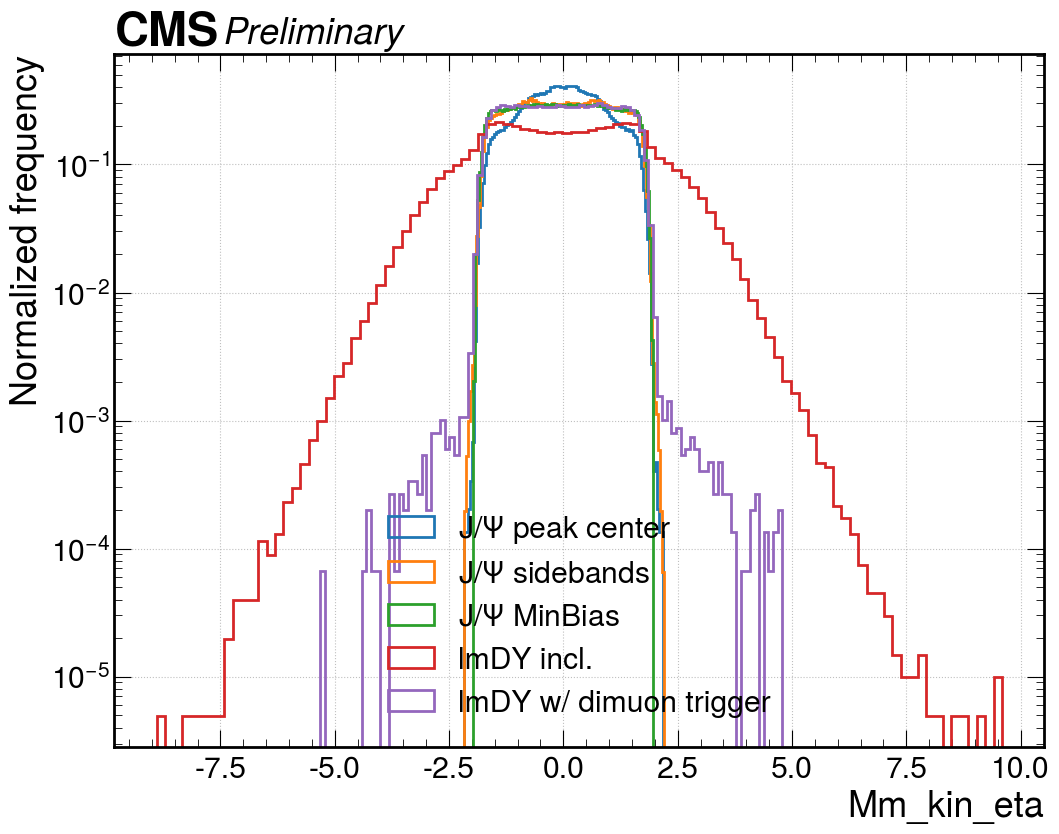

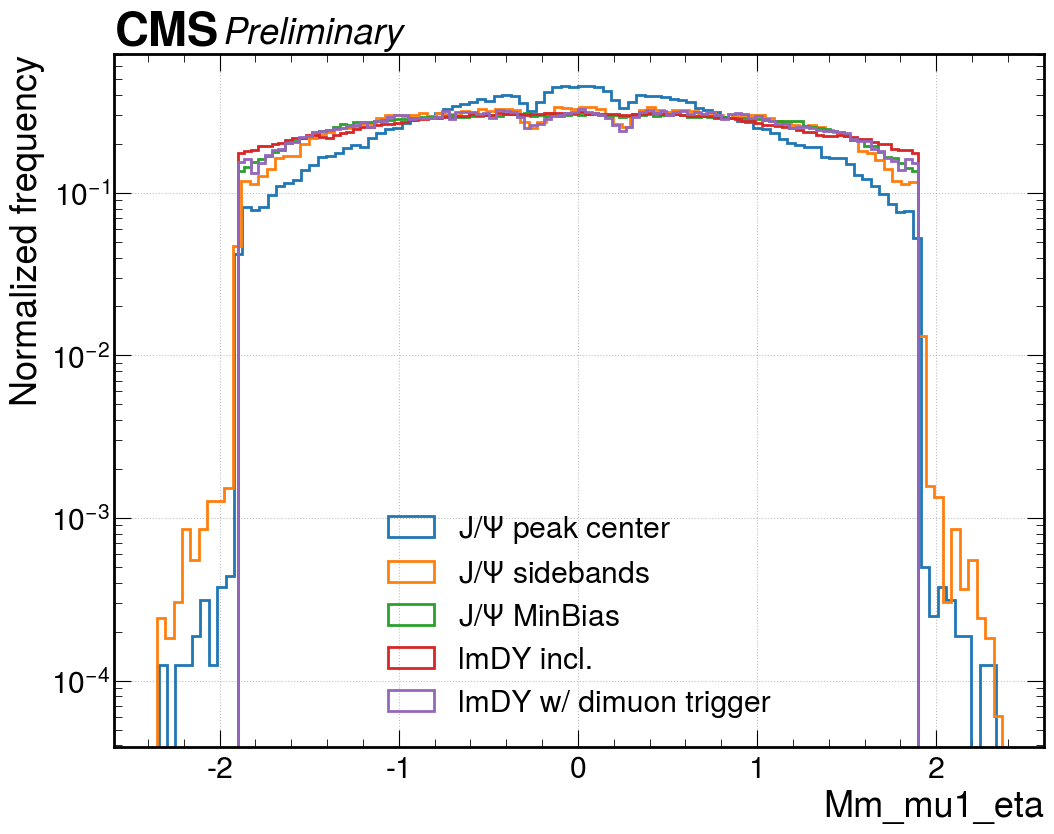

In [28]:
for q,items in branches.items():
    signal_pure = treeJpsiData[q].array()[sjpsi]
    bkg_pure = treeJpsiData[q].array()[bkgjpsi]
    signal_MC = treeJpsiMC[q].array()#[treeMC["Mm_kin_pt"].array() > 10]
    signal_lmDY = treelmDY[q].array()#[treeMC["Mm_kin_pt"].array() > 10]
    signal_lmDY_triggered = treelmDY[q].array()[dimuonTriggerCut]#[treeMC["Mm_kin_pt"].array() > 10]
    plot_hist([signal_pure,bkg_pure,signal_MC,signal_lmDY,signal_lmDY_triggered],["J/$\Psi$ peak center","J/$\Psi$ sidebands","J/$\Psi$ MinBias",  "lmDY incl.", "lmDY w/ dimuon trigger"],xlabel=str(q),xlim=items['lim'],density=True, log=True)#,signal_id,bkg_id

In [ ]:
# for q,items in branches.items():
#     signal_pure = tree[q].array()[sY]
#     bkg_pure = tree[q].array()[bY]
#     signal_id = tree[q].array()[sY]
#     bkg_id = tree[q].array()[bY&id]
#     plot_hist([signal_pure,bkg_pure,signal_id,bkg_id],["signal_pure","bkg_pure","signal_id","bkg_id"],xlabel=str(q),xlim=items['lim'], int=(items['t']=="i"))#,signal_id,bkg_id

In [ ]:
# print(len(treeUpsilonMC.arrays()), np.sum(treeUpsilonMC["Mm_kin_pt"].array()>10))

214 273389


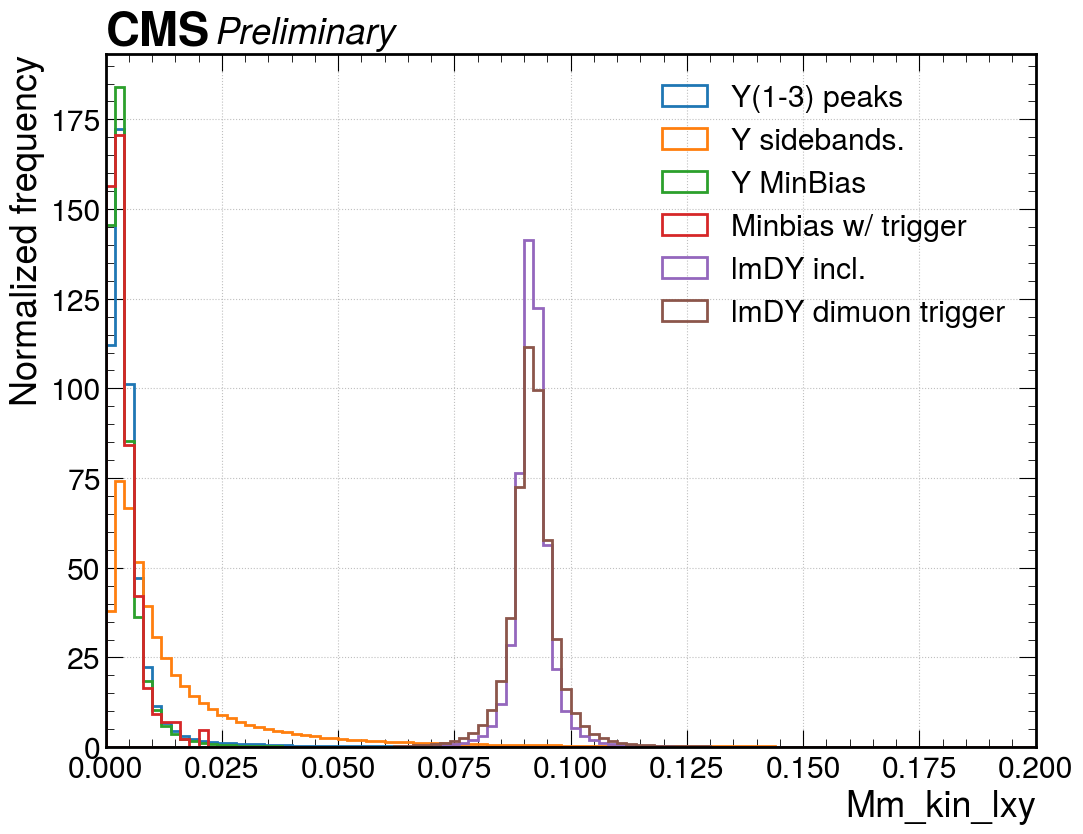

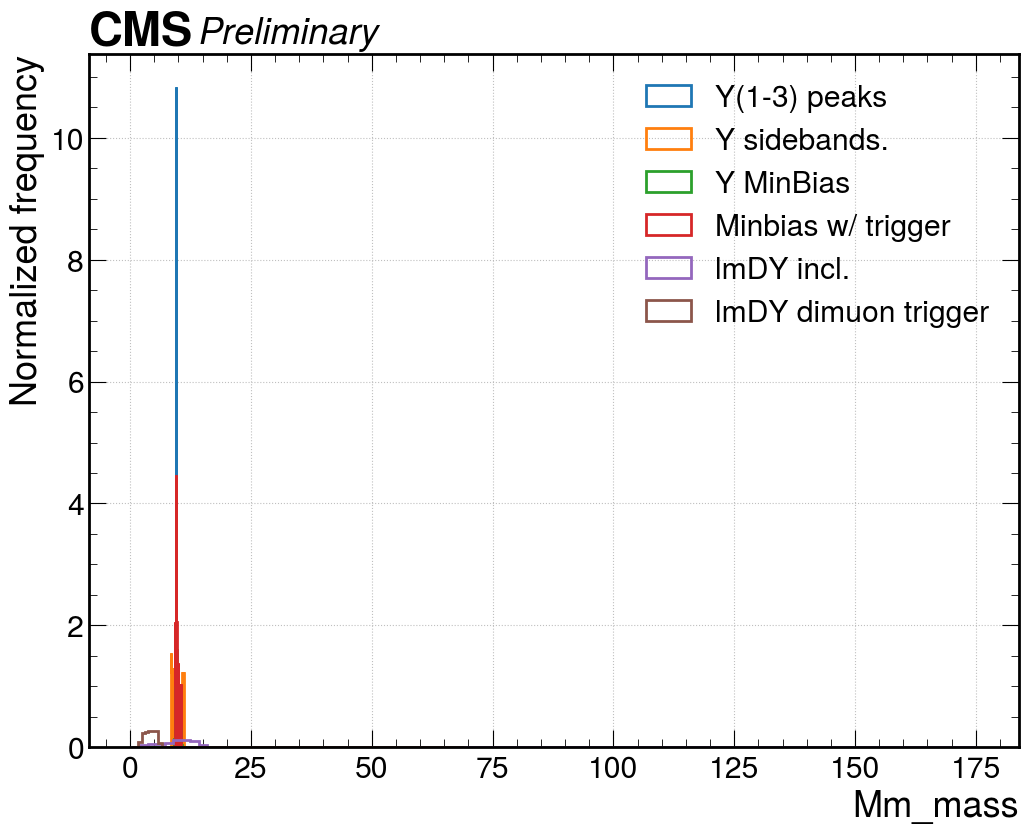

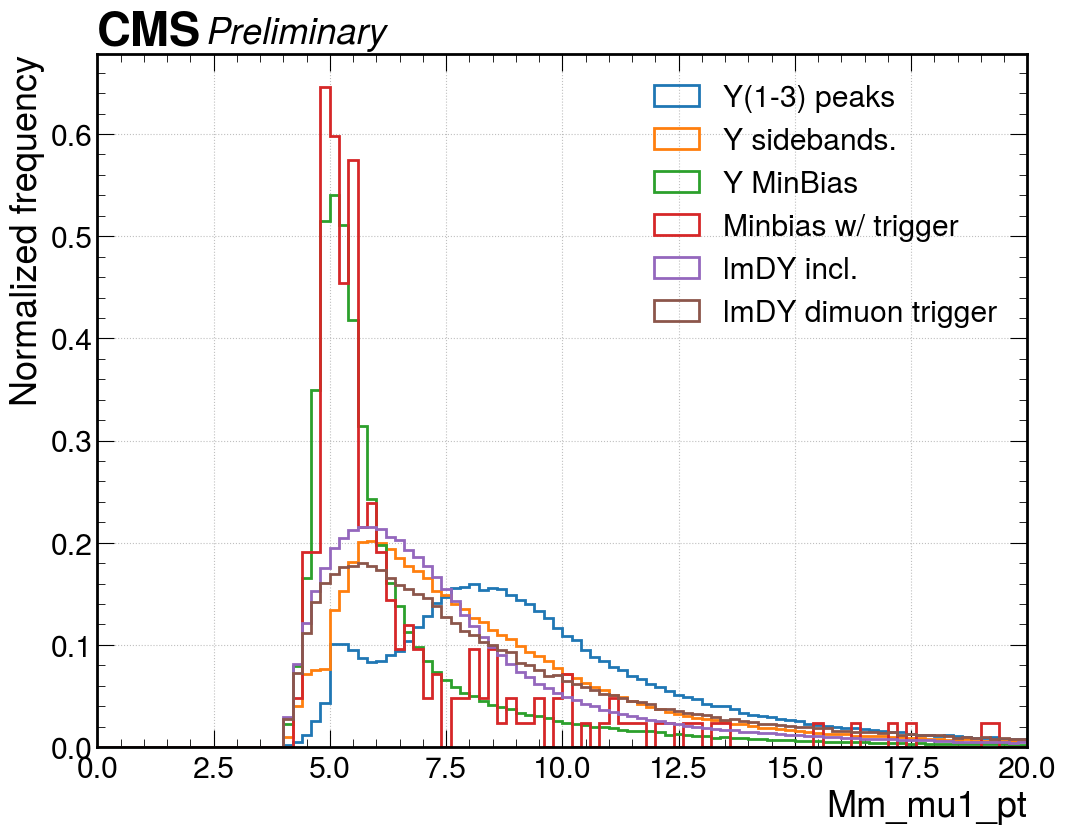

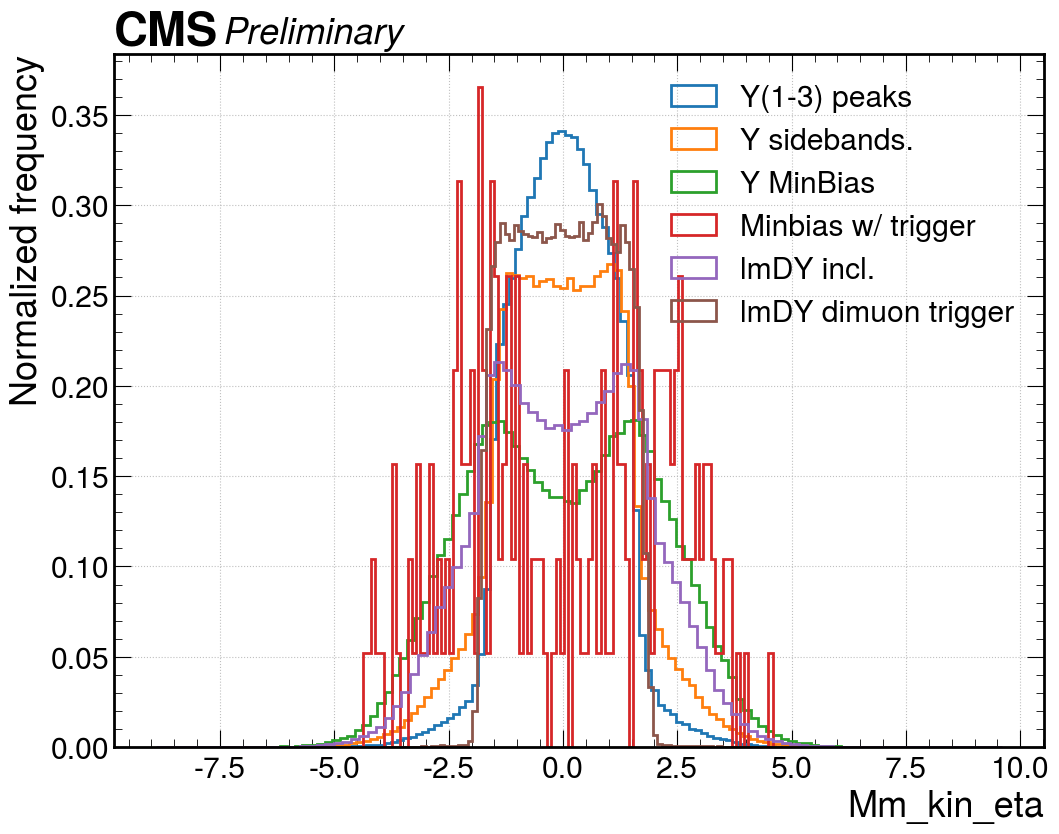

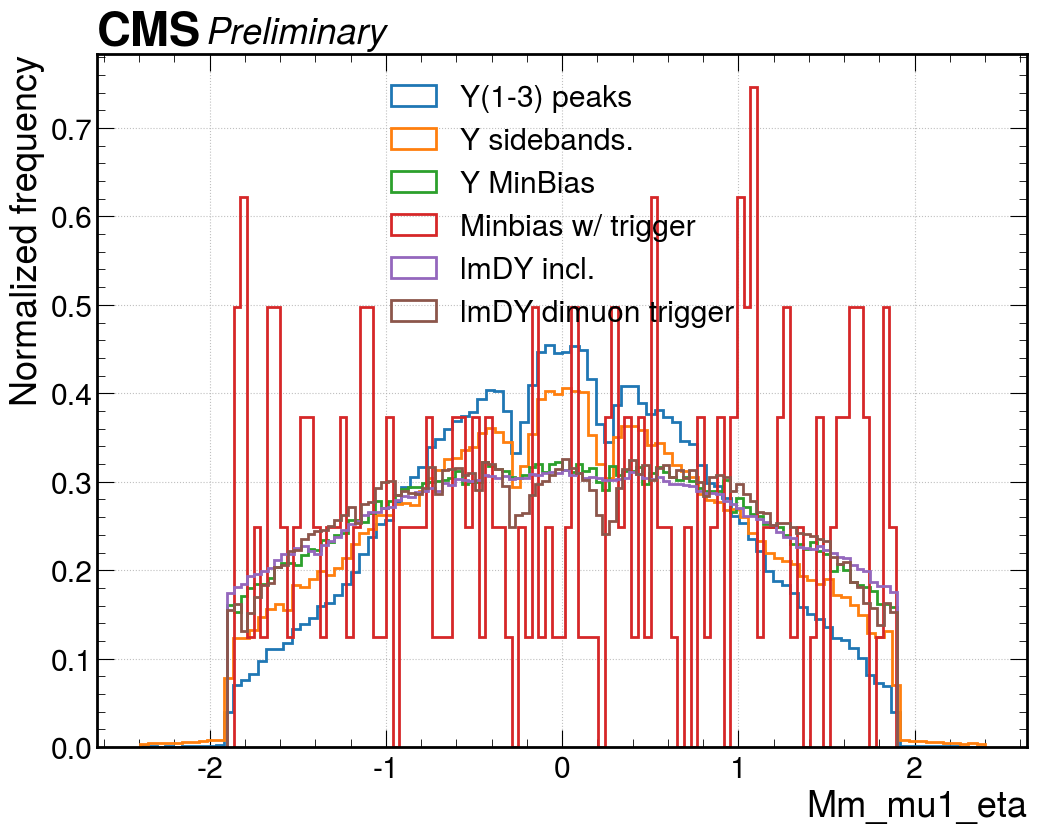

In [29]:
dimuonCut = treeYMC["HLT_Dimuon0_LowMass"].array()==1
print(sum(dimuonCut),len(dimuonCut))
for q,items in branches.items():
    signal_pure = treeYData[q].array()[sY]
    bkg_pure = treeYData[q].array()[bkgY]
    YMC = treeYMC[q].array()
    signal_MC_dimuon = treeYMC[q].array()[dimuonCut]    
    signal_lmDY = treelmDY[q].array()#[treeMC["Mm_kin_pt"].array() > 10]
    signal_lmDY_triggered = treelmDY[q].array()[dimuonTriggerCut]#[treeMC["Mm_kin_pt"].array() > 10]
    plot_hist([signal_pure,bkg_pure,YMC, signal_MC_dimuon,signal_lmDY,signal_lmDY_triggered],["Y(1-3) peaks ","Y sidebands.","Y MinBias", "Minbias w/ trigger", "lmDY incl.","lmDY dimuon trigger"],xlabel=str(q),xlim=items['lim'], log=False, density=True)#,signal_id,bkg_id

In [ ]:
# import ROOT
# file = ROOT.TFile.Open("/work/submit/mori25/Darkphotons_ludo/input.root")
# file.ls()
